In [1]:
%matplotlib inline
import sklearn.linear_model
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trains = pd.read_csv('../data/sydtrains.csv', thousands=',', index_col='STATION' )
trains2014 = trains[trains.YEAR == 2014]

In [3]:
scatter_data_in  = trains2014.loc[:, ["IN_1500_1830", "IN_1830_0200", "OUT_0600_0930"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f805cc0b790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f805a2de050>]], dtype=object)

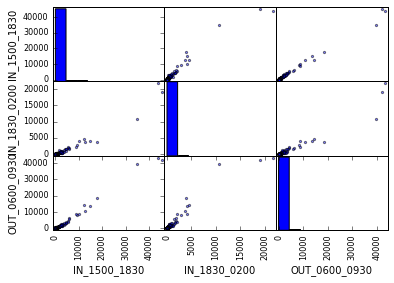

In [4]:
pd.scatter_matrix(scatter_data_in)

In [8]:
people_in_the_am  = trains2014.loc[:, ["OUT_0600_0930", "OUT_0930_1500"]]

In [9]:
people_in_the_pm = trains2014.IN_1500_1830

In [13]:
regressor = sklearn.linear_model.RANSACRegressor(max_trials=10000000)

In [15]:
regressor.fit(people_in_the_am, people_in_the_pm)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=10000000, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [16]:
predictions_for_pm = regressor.predict(people_in_the_am)
predictions_for_pm

array([  4.51671220e+04,   4.31976484e+04,   3.51233966e+04,
         1.34937580e+04,   1.64292975e+04,   1.16851979e+04,
         8.38427317e+03,   5.29550918e+03,   4.78600577e+03,
         9.57170198e+03,   1.23645323e+04,   3.46911527e+03,
         8.22245035e+03,   4.05025349e+03,   3.80822494e+03,
         4.05879697e+03,   2.74425450e+03,   2.47970982e+03,
         3.25752299e+03,   2.17691050e+03,   2.60414035e+03,
         5.80715475e+03,   1.88362680e+03,   4.14644480e+03,
         5.41584524e+03,   1.51677771e+03,   2.01862745e+03,
         2.47734807e+03,   2.69592953e+03,   1.81331296e+03,
         1.99897288e+03,   2.56910981e+03,   1.87691783e+03,
         1.21679877e+03,   2.08262232e+03,   3.18709935e+03,
         1.35648174e+03,   2.19884447e+03,   1.61238687e+03,
         1.30244740e+03,   1.33253485e+03,   2.30789903e+03,
         2.05731327e+03,   1.38180451e+03,   1.38229059e+03,
         1.18040607e+03,   2.56234594e+03,   1.25885966e+03,
         1.71088503e+03,

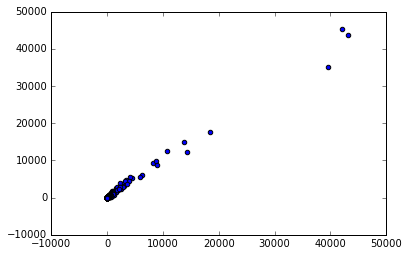

In [18]:
plt.scatter(trains2014.OUT_0600_0930, trains2014.IN_1500_1830)

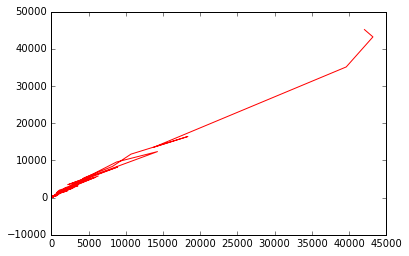

In [19]:
plt.plot(trains2014.OUT_0600_0930, predictions_for_pm, color='red')

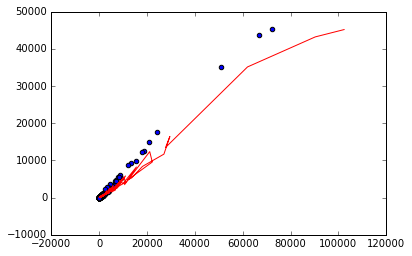

In [21]:
plt.scatter(trains2014.OUT_0600_0930 + trains2014.OUT_0930_1500, trains2014.IN_1500_1830)
plt.plot(trains2014.OUT_0600_0930 + trains2014.OUT_0930_1500+ trains2014.OUT_0930_1500 , predictions_for_pm, color='red')

In [22]:
regressor.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
regressor.estimator_.coef_ # for every person getting on the station 1.144 people get out

array([ 0.76536737,  0.43060492])

In [24]:
regressor.estimator_.intercept_

-14.621514674009461